Accessing data with R
===

[![R Binder Badge](https://img.shields.io/badge/Launch-R_Binder-blue)](https://mybinder.org/v2/gh/NOAA-CEFI-Portal/cefi-cookbook/r-setup?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252FNOAA-CEFI-Portal%252Fcefi-cookbook%26urlpath%3Dlab%252Ftree%252Fcefi-cookbook%252Fcontent%252Fdata_access%252Faccess_opendap%252Fr_get_cefi.ipynb%26branch%3Dmain)

The following notebook is a quick demostration on how to use R to access the OPeNDAP server data. This is designed for users that prefer the programing interface to be R. There are already couple of great resource related to preprocessing and visualizing data in R. Therefore, the notebook will not repeat that part of the code but focusing on how to accessing the data from a R interface. The resources is listed below 
> - http://cran.nexr.com/web/packages/rerddap/vignettes/Using_rerddap.html (A detail introduction of rerddap package and show the visualization in many different datasets)
> - https://ioos.github.io/ioos_code_lab/content/code_gallery/data_access_notebooks/2017-08-01-xtractoR.html (use a different package called xtractomatic to access the ERDDAP data)

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Launch R in Jupyterlab</p>
    In addition to the standard R code demonstrated below, our current interface leverages JupyterLab to execute R code using the R kernel. To enable this functionality, we utilize the environment.yml file to create a Conda/Mamba environment. The primary objective is to install the r-irkernel package within this environment.

This installation of r-irkernel through Conda/Mamba ensures that the R kernel becomes available as an option when launching JupyterLab. Selecting the R kernel empowers users to utilize the JupyterLab interface for running R code effortlessly.
    
</div>

## Packages used
To use R to access the OPeNDAP server directly from your R script or R-notebook, you will need
- ncdf4 

There are couple of ways to install the packages, here we provide two popular ways below
1. In the R environment, `install.packages('<package name>')`
2. In the conda/mamba environment for package version control, `conda install r-<package name>` or `mamba install r-<package name>` (many r package can be install this way by adding "r-" in front of the package name)


## Import R packages
The way to import packages to the current R environment is to use the `require` or `library` functions
Both functions will import the package but with subtle different of 
> The require() and library() functions can both be used to load packages in R, but they have one subtle difference:
>
> - require() will output a warning if a package is not installed and then continue to execute the code.
> - library() will output an error and stop the execution of the code.

Detail explanation can be find [here](https://www.statology.org/r-require-vs-library/#:~:text=The%20require()%20and%20library,the%20execution%20of%20the%20code.)

In [2]:
library("ncdf4")

## Help page for the package and related functions
A great way to find information about the package directly in the R-notebook environment is to add the `?` in front of the package/function name

In [2]:
??ncdf4

R Information

Help files with alias or concept or title matching ‘ncdf4’ using fuzzy
matching:


ncdf4::nc_version       Report version of ncdf4 library
ncdf4::ncdf4-package    Read, write, and create netCDF files (including
                        version 4 format)
  Aliases: ncdf4-package
ncdf4::ncdim_create     Internal ncdf4 functions
  Aliases: default_missval_ncdf4, blankstring_ncdf4, nslashes_ncdf4,
    ncdf4_format, ncdf4_make_id
ncdf4::print.ncdf4      Print Information About a netCDF File
  Aliases: print.ncdf4


Type '?PKG::FOO' to inspect entries 'PKG::FOO', or 'TYPE?PKG::FOO' for
entries like 'PKG::FOO-TYPE'.




## Direct OPeNDAP server data access

With the help of the ncdf4 package we are able to load the data that is hosted on the OPeNDAP server and grab the coordinate and attribute without the need to downloading the entire dataset.

- first we need to find the URL that can provide the OPeNDAP access for R (this can be find on the THREDDS server [here](https://psl.noaa.gov/thredds/catalog/Projects/CEFI/regional_mom6/northwest_atlantic/hist_run/catalog.html))
- click on OPeNDAP option when clicking on any of the netcdf files
- on top of the OPeNDAP form there is a URL for accessing the data

```{tip}
[Understanding of the OPeNDAP server and what it provides](opendapData) is highly recommended before reading the following intructions.
```

### Link to data source (regular gridded product)

In [3]:
# Specify the OPeNDAP server URL (using regular grid output)
url <- "http://psl.noaa.gov/thredds/dodsC/Projects/CEFI/regional_mom6/northwest_atlantic/hist_run/regrid/ocean_monthly.199301-201912.sos.nc"

# Open a NetCDF file lazily and remotely
ncopendap <- nc_open(url)


### Load the data to local memory
```{warning}
There is a 500MB limit per request so making sure the data request each time is not over the limit. For loop to seperate the request is one of the solution to avoid the single time request becoming to large.
```

Here we only request a single slice in the time domain but the whole northeast Atlantic domain in the regional mom6 model. Since this is the part that actually downloading the data. It would takes a bit longer.

In [4]:
# Read the data into memory
timeslice = 1
lon <- ncvar_get(ncopendap, "lon")
lat <- ncvar_get(ncopendap, "lat")
time <- ncvar_get(ncopendap, "time",start = c(timeslice), count = c(1))

# Read a slice of the data into memory
sos <- ncvar_get(ncopendap, "sos", start = c(1, 1, timeslice), count = c(-1, -1, 1))


In [5]:
# the matrix output of sea surface salinity
sos

NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


### Converting time array to datetime
The origial time would be only in the unit of time "days since 1993-01-01". In order to understand what is the actual time. We need to grab the time unit and the time number and convert to a datetime object.

In [6]:
# Get the units
tunits <- ncatt_get(ncopendap, "time", "units")
datesince <- tunits$value
datesince <- substr(datesince, nchar(datesince)-9, nchar(datesince))
datesince

[1] "1993-01-01"

In [7]:
# convert the number to datetime (input should be in second while the time is in unit of days)
datetime_var <- as.POSIXct(time*86400, origin=datesince, tz="UTC")
datetime_var

[1] "1993-01-16 12:00:00 UTC"

### Quick view of the data

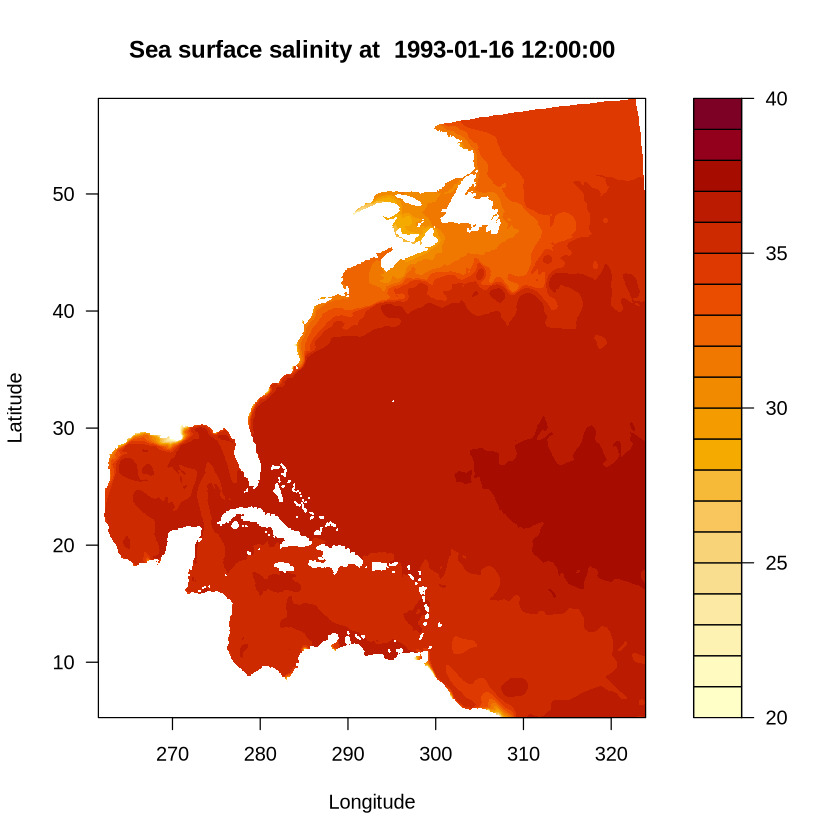

In [8]:
filled.contour(lon, lat, sos, main = paste("Sea surface salinity at ", datetime_var), xlab = "Longitude", ylab = "Latitude", levels = pretty(c(20,40), 20))

### Convert the matrix to dataframe 

In [10]:
df <- expand.grid(X = lon, Y = lat)
data <- as.vector(t(sos))
df$Data <- data
names(df) <- c("lon", "lat", "sos")


In [11]:
df

lon,lat,sos
<dbl[1d]>,<dbl[1d]>,<dbl>
261.5577,5.272542,NA
261.6384,5.272542,NA
261.7191,5.272542,NA
261.7998,5.272542,NA
261.8804,5.272542,NA
261.9611,5.272542,NA
262.0418,5.272542,NA
262.1225,5.272542,NA
262.2031,5.272542,NA


### Link to data source (Raw gridded product)

Let's proceed to load a more complex data structure, specifically the raw grid structure from the regional MOM6 output. This time besides the data itself we also need to load the grid structure that is stored in another file

In [14]:
# Specify the OPeNDAP server URL (using regular grid output)
url <- "http://psl.noaa.gov/thredds/dodsC/Projects/CEFI/regional_mom6/northwest_atlantic/hist_run/ocean_monthly.199301-201912.sos.nc"
url_static <- "http://psl.noaa.gov/thredds/dodsC/Projects/CEFI/regional_mom6/northwest_atlantic/hist_run/ocean_static.nc"

# Open a NetCDF file lazily and remotely
ncopendap <- nc_open(url)
ncstaticopendap <- nc_open(url_static)


### Load the data to local memory

In [30]:
# Read the data into memory
timeslice = 1
lon <- ncvar_get(ncstaticopendap, "geolon")
lat <- ncvar_get(ncstaticopendap, "geolat")
x <- ncvar_get(ncopendap, "xh")
y <- ncvar_get(ncopendap, "yh")
time <- ncvar_get(ncopendap, "time",start = c(timeslice), count = c(1))

# Read a slice of the data into memory
sos <- ncvar_get(ncopendap, "sos", start = c(1, 1, timeslice), count = c(-1, -1, 1))


In [17]:
# the matrix output of sea surface salinity in raw grid
sos

NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


### Converting time array to datetime
The origial time would be only in the unit of time "days since 1993-01-01". In order to understand what is the actual time. We need to grab the time unit and the time number and convert to a datetime object.

In [28]:
# Get the units
tunits <- ncatt_get(ncopendap, "time", "units")
datesince <- tunits$value
datesince <- substr(datesince, nchar(datesince)-18, nchar(datesince)-8)
datesince

[1] "1993-01-01 "

In [31]:
# convert the number to datetime (input should be in second while the time is in unit of days)
datetime_var <- as.POSIXct(time*86400, origin=datesince, tz="UTC")
datetime_var

[1] "1993-01-16 12:00:00 UTC"

### Quick view of the data

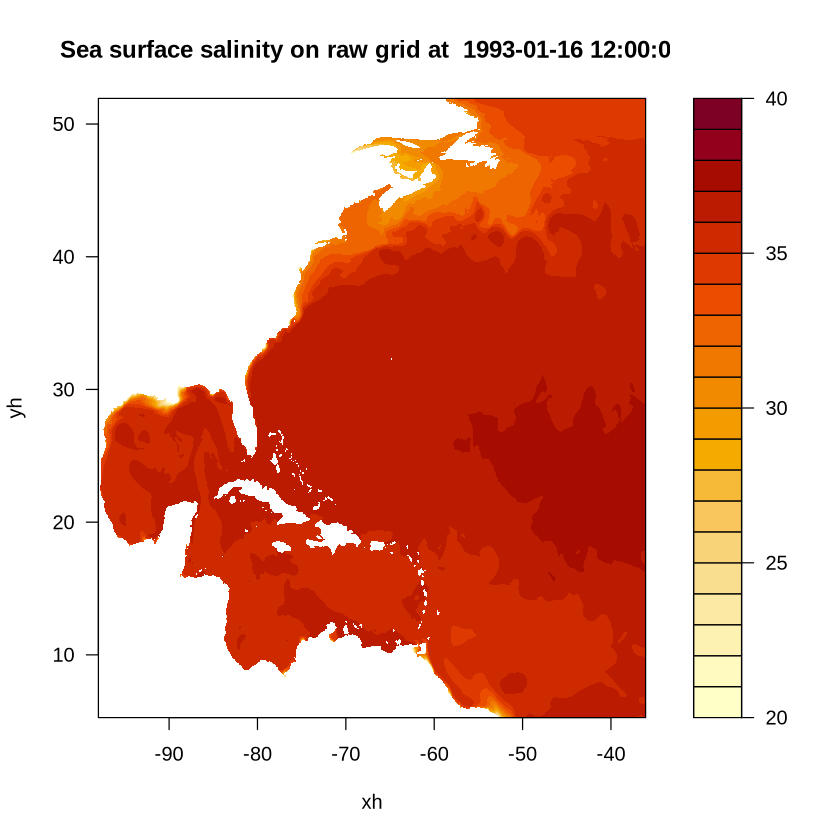

In [33]:
filled.contour(x, y, sos, main = paste("Sea surface salinity on raw grid at ", datetime_var), xlab = "xh", ylab = "yh", levels = pretty(c(20,40), 20))

### Convert the matrix to dataframe 
Since we might want the dataframe to represent the lon lat data structure. We can convert the lon, lat,(not xh,yh which represents the grid number and not the actual lon lat) and data matrix to the dataframe.

In [41]:
X <- as.vector(t(lon))
Y <- as.vector(t(lat))
data <- as.vector(t(sos))

df <- data.frame(
  "lon" = X,
  "lat" = Y,
  "sos" = data
)

In [42]:
df

lon,lat,sos
<dbl>,<dbl>,<dbl>
-98,5.272542,NA
-98,5.352199,NA
-98,5.431845,NA
-98,5.511480,NA
-98,5.591105,NA
-98,5.670719,NA
-98,5.750322,NA
-98,5.829914,NA
-98,5.909494,NA
